# Setting up the Environment

installing the following dependencies with the help of the pip installer:

1. OpenCV
2. TensorFlow
3. Keras
4. ImageAI

In [1]:
#Installing OpenCV

pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Installing TensorFlow 2

pip install tensorflow

In [3]:
#Installing Keras

pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# imageAI installation

pip install imageai

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(config_file,frozen_model)

In [7]:
classLabels = []  # Created empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [8]:
#Checking classLabels

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


# Read an Image

In [39]:
img = cv2.imread('man&car.jpg')

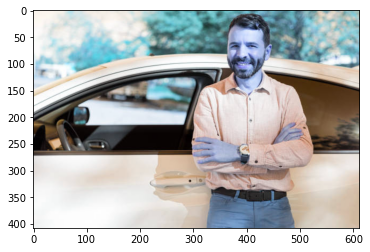

In [40]:
plt.imshow(img)
##BGR image

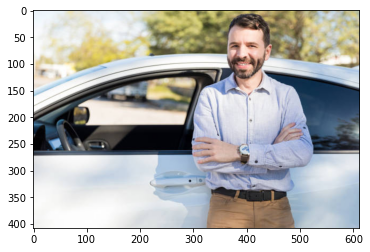

In [41]:
#Converting into RGB

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
#Setting us Model via configuration file

In [42]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)  ##225/2=127.5
model.setInputMean((127.5,127.5,127.5))  ##mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000248739E1B50>

In [43]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [44]:
print(ClassIndex)

[1 3]


In [45]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 225, 0), thickness=3)

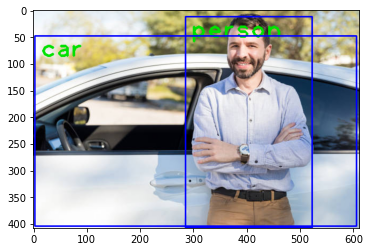

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))